<a href="https://colab.research.google.com/github/chrisfinan/GenAI/blob/main/HW2/Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Chris Finan
> Assignment 2

> 9/26/24

#Description
* In this assignment, I will create a multi-layer perceptron and a convolutional neural network. I will be using the CIFAR-10 dataset and will compare the performance of both of the models by using .evaluate() and plotting graphs.

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets

##0. Parameters

In [28]:
NUM_CLASSES = 10

##1. Data Preprocessing

* Load the CIFAR-10 dataset using the appropriate function from tf.keras.datasets.

In [29]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

* Normalize the images by dividing by 255.0.

In [30]:
#Note: labels are not one-hot encoded so I can use the sparse categorical crossentropy
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [31]:
display(x_train[:10])
print(y_train[:10])

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


##2. MLP Model


* ### Declare the function: def create_mlp_model(input_shape)

* ### Have the function create an MLP model using Sequential and add layers using Flatten and Dense from tf.keras.layers.

* ### Add Dropout layers: Dropout helps prevent overfitting by randomly setting a fraction of input units to 0 at each update during training time, which helps the model generalize better.


In [32]:
def create_mlp_model(input_shape):
  #creates the base sequential model
  model = models.Sequential()

  #adds input layer using the input shape and flattens it
  model.add(layers.Flatten(input_shape=input_shape))

  model.add(layers.Dense(200, activation="relu"))
  model.add(layers.Dense(150, activation="relu"))
  model.add(layers.Dense(100, activation="relu"))
  #After testing a few different orientations, 0.1 dropout yielded the best results here
  model.add(layers.Dropout(0.1))

  #Output layer - Softmax because multi-class
  model.add(layers.Dense(NUM_CLASSES, activation="softmax"))

  model.summary()

  return model



In [33]:
input_shape = (32, 32, 3)
mlp_model = create_mlp_model(input_shape)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 200)                 │         614,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 150)                 │          30,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          15,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 660,860 (2.52 MB)

 Trainable params: 660,860 (2.52 MB)

 Non-trainable params: 0 (0.00 B)


* ### Compile the MLP model with an optimizer and loss function (adam and sparse_categorical_crossentropy).

In [34]:
opt = optimizers.Adam(learning_rate=0.0005)
mlp_model.compile(
    loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

* ### Train the MLP model using the fit method and include validation split.

In [35]:
mlp_fit = mlp_model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2760 - loss: 1.9800 - val_accuracy: 0.3985 - val_loss: 1.6963
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3845 - loss: 1.7033 - val_accuracy: 0.4339 - val_loss: 1.5857
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4221 - loss: 1.6059 - val_accuracy: 0.4483 - val_loss: 1.5528
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4454 - loss: 1.5540 - val_accuracy: 0.4646 - val_loss: 1.5021
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4576 - loss: 1.5091 - val_accuracy: 0.4702 - val_loss: 1.4918
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4698 - loss: 1.4784 - val_accuracy: 0.4775 - val_loss: 1.4649
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4880 - loss: 1.4414 - val_accuracy: 0.4818 - val_loss: 1.4512
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4880 - loss: 1.4221 -

##3. CNN Model (Using Strides)


* ### Declare the function: def create_cnn_model(input_shape)

* ### Have the function create a CNN model using Sequential and add layers using Conv2D, BatchNormalization, ReLU, Flatten, Dense, and Dropout from tf.keras.layers. Use strides to reduce spatial dimensions.

In [36]:
def create_cnn_model(input_shape):
  #creates the base sequential model
  model = models.Sequential()

  #add input layer
  model.add(layers.Input(input_shape))

  #first COV2D layer - output shape: (32, 32, 32)
  model.add(layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same"))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

  #second COV2D layer - output shape: (16, 16, 32)
  model.add(layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same"))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

  #third COV2D layer - output shape: (16, 16, 64)
  model.add(layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

  #fourth COV2D layer - output shape: (8, 8, 64)
  model.add(layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same"))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

  #flattens convoluded input layer - output shape: (4096)
  model.add(layers.Flatten())

  #add dense layers like MLP - output shape: (128)
  model.add(layers.Dense(128))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  model.add(layers.Dropout(rate=0.5))

  #add output layer (dense layer with set number of classes and softmax activation for multiple classes)
  model.add(layers.Dense(NUM_CLASSES))
  model.add(layers.Activation("softmax"))

  model.summary()

  return model

In [37]:
cnn_model = create_cnn_model(input_shape)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_6 (ReLU)                       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_7 (ReLU)                       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_8 (ReLU)                       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_9 (ReLU)                       │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 10)                  │              

 Total params: 592,554 (2.26 MB)

 Trainable params: 591,914 (2.26 MB)

 Non-trainable params: 640 (2.50 KB)


* ### Compile the CNN model with an optimizer and loss function (adam and sparse_categorical_crossentropy).

In [38]:
opt = optimizers.Adam(learning_rate=0.0005)
cnn_model.compile(
    loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

* ### Train the CNN model using the fit method and include validation split.

In [39]:
cnn_fit = cnn_model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.3877 - loss: 1.7696 - val_accuracy: 0.5364 - val_loss: 1.3179
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.6030 - loss: 1.1259 - val_accuracy: 0.6035 - val_loss: 1.1020
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6742 - loss: 0.9307 - val_accuracy: 0.6265 - val_loss: 1.0456
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7134 - loss: 0.8185 - val_accuracy: 0.6870 - val_loss: 0.8891
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7511 - loss: 0.7218 - val_accuracy: 0.7126 - val_loss: 0.8261
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7702 - loss: 0.6563 - val_accuracy: 0.6858 - val_loss: 0.9689
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7946 - loss: 0.5930 - val_accuracy: 0.7331 - val_loss: 0.7949
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8091 - loss: 0.55

##4. Evaluation:



* ### Evaluate both models on the test set using the evaluate method.

In [40]:
mlp_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4905 - loss: 1.4284


[1.4364064931869507, 0.4869000017642975]

In [41]:
cnn_model.evaluate(x_test, y_test, batch_size=1000)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7028 - loss: 0.9148


[0.9298622012138367, 0.7009999752044678]

* ### Performance Comparison: Discuss the test accuracy and loss of both models.

As you can see when evaluating the CNN model, it is much more effective than the MLP model when managing high level features and classifying images. The CNN has a loss of 0.7344 and accuracy of 0.7615 where the MLP has a loss of 1.4452 and accuracy of 0.4857. The CNN has a good start for overall accuracy where the MLP is worse than flipping a coin. The loss for the CNN is also almost twice as low as the MLP.

> NOTE: After running this again when testing for GPU times, new results occurred->
MLP: accuracy=0.4905, loss=1.4284 and CNN: accuracy=0.7028, loss=0.9148 -> the same comparison applies with the numbers being slightly different.

##5. Plotting Results:



* ### Plot the validation accuracy for both models using matplotlib.pyplot.

* ### Plot the training accuracy for both models using matplotlib.pyplot.

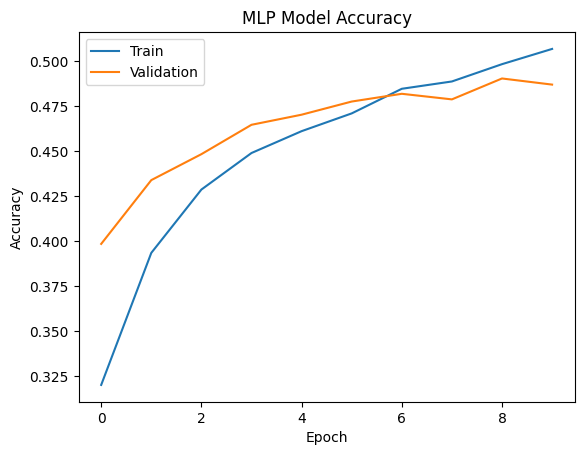

In [42]:
plt.plot(mlp_fit.history['accuracy'])
plt.plot(mlp_fit.history['val_accuracy'])
plt.title('MLP Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The MLP model has a fairly good relationsip with its train and validation sets. They both increase fast in the beginning, then even out in the end. Though, at the end of the epochs, the validation accuracy ends when decreasing, making the test accuracy lower on the last epoch.

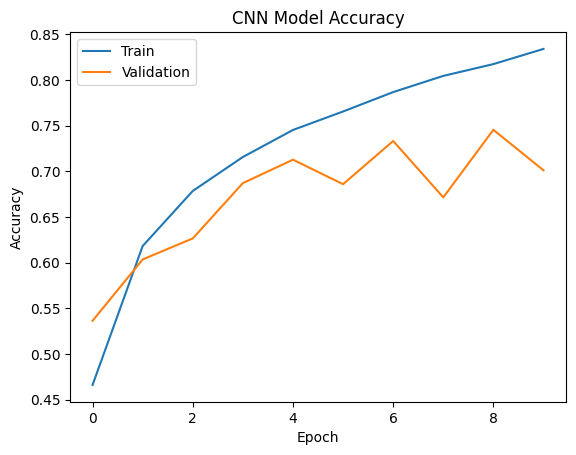

In [43]:
plt.plot(cnn_fit.history['accuracy'])
plt.plot(cnn_fit.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The CNN model training accuracy looks very nice and very similar to the MLP with a relatively smooth curve. However, the validation accuracy looks very strange most likely due to overfitting. It starts off with an increase, but the accuracy jumps up and down after epoch 4. The CNN is much more accurate than the MLP, but less consistent in the validation data.

##6. Conclusion

### Model Complexity: Explain why CNNs are generally better suited for image classification tasks compared to MLPs, focusing on the spatial hierarchies learned by CNNs.

> CNN models are much more complex and are better suited for image classifying because they convolude the input layer before it is flattened. They are able to view the relationships between pixels when going through the convolution process. CNNs use spatial hierarchies with multiple convolution layers that examine different complexities of features. The lowest layers in the spatial hierarchy detect the simplest features, where the deepest layers detect the most complex parts.


###Training Time: Compare the training time and resource usage of both models.

> I ran out of time using the TPU, so I am testing the times with the T4 GPU. The training time of the MLP lasted 53 seconds, where the training time of the CNN lasted around 1 minute and 20 seconds. I was surprised how quick the GPU ran all of the code when the TPU took around 5 minutes for overall execution. The MLP stayed around 3.8 GB of system RAM during execution (after resting at 3.1-3.2). The CNN moved up to around 4.0 GB in system RAM. The other numbers stayed the same.



### Overfitting and Regularization: Discuss any signs of overfitting and how regularization techniques like dropout help mitigate it.

> Big signs of overfitting is the validation test results of a model being much less accurate than the training results or the validation loss being inconsistent compared to training. The model essentially memorizes the training set and generalizes when it sees some of the same features in different pictures and misclassifies them. Using dropout mitigates overfitting because it randomly selects neurons to be deactivated in a layer so the model doesn't become reliant on those specific neurons. It is like thinking with different parts of the brain.

> The CNN may be slightly overfitted because the validation accuracy is lower than the training accuracy and the loss in the training set continues to decrease while the validation loss fluctuates up and down. The MLP is not overfitted, as both training and validation are consistent with no discrepancies. However, the MLP is not good for image classification so it does not have high accuracy.